In [ ]:
# # ==============================
# # 🩺 STEP 1: Environment Setup
# # ==============================
# # !pip install ultralytics==8.2.97
# # !pip install easyocr==1.7.1
# # !pip install torch torchvision torchaudio
# # !pip install matplotlib opencv-python pillow

# import os
# import torch
# import cv2
# import matplotlib.pyplot as plt
# from ultralytics import YOLO
# from IPython.display import Image, display
# from google.colab import files
# import zipfile

# # ==============================
# # 🧩 STEP 2: Dataset Setup
# # ==============================

# # Upload your dataset ZIP file (containing train/valid/test folders)
# uploaded = files.upload()

# zip_path = list(uploaded.keys())[0]  # automatically detect uploaded file
# extract_path = "/content/dataset"

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_path)

# print("✅ Dataset extracted to:", extract_path)
# !ls -R /content/dataset

# # ==============================
# # 🧾 STEP 3: Create data.yaml
# # ==============================

# yaml_path = "/content/dataset/data.yaml"

# new_yaml = """train: /content/dataset/dataset/train/images
# val: /content/dataset/dataset/valid/images
# test: /content/dataset/dataset/test/images

# nc: 1
# names: ['medicine']
# """

# with open(yaml_path, "w") as f:
#     f.write(new_yaml)

# print("✅ YAML file updated successfully!")
# !cat /content/dataset/data.yaml

# # ==============================
# # ⚙️ STEP 4: Train YOLOv8
# # ==============================
# from ultralytics import YOLO

# model = YOLO('yolov8n.pt')  # Pretrained YOLOv8n model

# results = model.train(
#     data='/content/dataset/data.yaml',
#     epochs=100,
#     imgsz=640,
#     batch=8,
#     name='medicine_detector',
#     device=0
# )

# print("✅ Training Completed!")

# # ==============================
# # 🧠 STEP 5: Load Trained Model
# # ==============================
# trained_model_path = "/content/runs/detect/medicine_detector/weights/best.pt"
# model = YOLO(trained_model_path)
# print("✅ Model loaded successfully!")

# # ==============================
# # 🩻 STEP 6: Upload Test Image
# # ==============================
# uploaded = files.upload()
# image_path = list(uploaded.keys())[0]

# results = model.predict(source=image_path, show=True, save=True, conf=0.25)
# print("✅ Detection completed!")

# # ==============================
# # 🪟 STEP 7: Crop Detected Medicines
# # ==============================
# import os
# import cv2
# from IPython.display import Image as IPImage

# os.makedirs("/content/crops", exist_ok=True)

# img = cv2.imread(image_path)
# crop_paths = []

# for r in results:
#     for i, box in enumerate(r.boxes.xyxy):
#         x1, y1, x2, y2 = map(int, box)
#         crop = img[y1:y2, x1:x2]
#         crop_path = f"/content/crops/medicine_{i+1}.jpg"
#         cv2.imwrite(crop_path, crop)
#         crop_paths.append(crop_path)
#         print(f"✅ Saved: {crop_path}")

# print("\n🖼️ Showing cropped medicine images:\n")
# for path in crop_paths:
#     display(IPImage(filename=path))

# # ==============================
# # 🧾 STEP 8: Run EasyOCR on Crops
# # ==============================
# import easyocr

# reader = easyocr.Reader(['en'])

# print("\n🔍 Detected Text from Cropped Medicines:\n")
# for path in crop_paths:
#     result = reader.readtext(path, detail=0)
#     print(f"{os.path.basename(path)} → {result}")


In [ ]:
# !pip install easyocr==1.7.1


NEW PAGEEEEE

In [ ]:
# ==============================
# 🩺 STEP 1: Environment Setup
# ==============================

!pip install ultralytics==8.2.97 --quiet
!pip install easyocr==1.7.1 --quiet
!pip install torch torchvision torchaudio --quiet
!pip install matplotlib opencv-python pillow --quiet

import os
import torch
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
from IPython.display import Image, display
from google.colab import files
import zipfile

print("✅ Environment ready!")


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ultralytics 8.2.97 requires numpy<2.0.0,>=1.2

In [ ]:
# # ==============================
# # 🧩 STEP 2: Dataset Setup
# # ==============================

# Upload dataset ZIP file (containing train/valid/test folders)
uploaded = files.upload()

zip_path = list(uploaded.keys())[0]
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted to:", extract_path)
!ls -R /content/dataset


Saving dataset.zip to dataset.zip
✅ Dataset extracted to: /content/dataset
/content/dataset:
dataset

/content/dataset/dataset:
data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid

/content/dataset/dataset/test:
images	labels

/content/dataset/dataset/test/images:
12_jpg.rf.d4bd56a430f67a01dca47b85afcbab65.jpg
18_jpg.rf.fbcfb63a897db031728895790b4822ed.jpg
25_jpg.rf.112374368722a0e0a21d0e22b4cf20a3.jpg

/content/dataset/dataset/test/labels:
12_jpg.rf.d4bd56a430f67a01dca47b85afcbab65.txt
18_jpg.rf.fbcfb63a897db031728895790b4822ed.txt
25_jpg.rf.112374368722a0e0a21d0e22b4cf20a3.txt

/content/dataset/dataset/train:
images	labels

/content/dataset/dataset/train/images:
13_jpg.rf.064675d6d3462628b38282e2f88f3439.jpg
14_jpg.rf.3d72028a9ad858992d887626f2e2bfc9.jpg
15_jpg.rf.cdc17860be5b63280cd6c042a38aa7f3.jpg
17_jpg.rf.eb53ba10ac3e1548bd8b55e11cbad72f.jpg
1_jpg.rf.eabbde6124883a78a906975d8f35603a.jpg
20_jpg.rf.903510bc49b08f8301737026a6e27480.jpg
21_jpg.rf.8fa32a182de9cb889

In [ ]:
# # ==============================
# # 🧾 STEP 3: Create data.yaml
# # ==============================

yaml_path = "/content/dataset/data.yaml"

new_yaml = """train: /content/dataset/dataset/train/images
val: /content/dataset/dataset/valid/images
test: /content/dataset/dataset/test/images

nc: 1
names: ['medicine']
"""

with open(yaml_path, "w") as f:
    f.write(new_yaml)

print("✅ YAML file created successfully!")
!cat /content/dataset/data.yaml


✅ YAML file created successfully!
train: /content/dataset/dataset/train/images
val: /content/dataset/dataset/valid/images
test: /content/dataset/dataset/test/images

nc: 1
names: ['medicine']


In [ ]:
# # ==============================
# # ⚙️ STEP 4: Train YOLOv8
# # ==============================

from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # Pretrained YOLOv8n model

results = model.train(
    data='/content/dataset/data.yaml',
    epochs=100,
    imgsz=640,
    batch=8,
    name='medicine_detector',
    device=0
)

print("✅ Training Completed!")


100%|██████████| 6.25M/6.25M [00:00<00:00, 112MB/s]


New https://pypi.org/project/ultralytics/8.3.223 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.97 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=medicine_detector, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fals

100%|██████████| 755k/755k [00:00<00:00, 26.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: 3517piyushsvjc (3517piyushsvjc-xavier-institute-of-engineering) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /content/dataset/dataset/train/labels... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 2623.90it/s]

train: New cache created: /content/dataset/dataset/train/labels.cache



val: Scanning /content/dataset/dataset/valid/labels... 7 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7/7 [00:00<00:00, 5745.62it/s]

val: New cache created: /content/dataset/dataset/valid/labels.cache


Plotting labels to runs/detect/medicine_detector/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/medicine_detector
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       1.2G      3.071       3.44      2.621         27        640: 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all          7         18    0.00476      0.556    0.00565    0.00113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.15G      3.017      3.496      2.661         15        640: 100%|██████████| 3/3 [00:00<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.51it/s]

                   all          7         18    0.00476      0.556    0.00619     0.0015



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       1.2G       2.74      3.343      2.469         28        640: 100%|██████████| 3/3 [00:00<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.52it/s]


                   all          7         18     0.0081      0.944    0.00887    0.00342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.22G      2.276      3.214      2.158          9        640: 100%|██████████| 3/3 [00:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]

                   all          7         18    0.00857          1      0.523      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       1.2G      1.683      2.721      1.709         24        640: 100%|██████████| 3/3 [00:00<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.88it/s]

                   all          7         18    0.00857          1      0.884      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.21G      1.903      2.236      1.673         23        640: 100%|██████████| 3/3 [00:00<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.96it/s]

                   all          7         18    0.00857          1       0.99       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       1.2G      1.703      1.901      1.531         16        640: 100%|██████████| 3/3 [00:00<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.60it/s]

                   all          7         18          1      0.788      0.988      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.22G      1.666      1.881      1.571         19        640: 100%|██████████| 3/3 [00:00<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.49it/s]

                   all          7         18      0.787      0.833      0.873      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.21G      1.504      1.662      1.423         20        640: 100%|██████████| 3/3 [00:00<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.19it/s]

                   all          7         18      0.751      0.836      0.901      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.22G      1.642      1.951      1.607         15        640: 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.93it/s]

                   all          7         18      0.634          1      0.995      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.22G      1.767      1.742      1.569         20        640: 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.42it/s]

                   all          7         18          1      0.992      0.995      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.22G       1.42      1.587      1.372         15        640: 100%|██████████| 3/3 [00:00<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.67it/s]


                   all          7         18          1      0.745      0.995      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.21G      1.549      1.538      1.384         13        640: 100%|██████████| 3/3 [00:00<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.03it/s]

                   all          7         18          1      0.805      0.995      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.22G      1.611      1.436       1.43         17        640: 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.10it/s]

                   all          7         18          1      0.796      0.995      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.21G       1.72      1.295      1.381         30        640: 100%|██████████| 3/3 [00:00<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.00it/s]

                   all          7         18          1      0.796      0.995      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.22G      1.645       1.42      1.342         18        640: 100%|██████████| 3/3 [00:00<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.76it/s]

                   all          7         18      0.927      0.703       0.97      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.21G      1.629      1.437      1.419         22        640: 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.81it/s]

                   all          7         18          1      0.688      0.974      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.21G      1.681      1.587      1.502         21        640: 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.25it/s]

                   all          7         18          1      0.688      0.974      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.22G      1.649      1.455      1.426         13        640: 100%|██████████| 3/3 [00:00<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.99it/s]

                   all          7         18          1       0.41      0.772      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.21G      1.676      1.415      1.426         26        640: 100%|██████████| 3/3 [00:00<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.43it/s]

                   all          7         18       0.99      0.667      0.889      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.22G      1.498      1.331      1.383         17        640: 100%|██████████| 3/3 [00:00<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.78it/s]


                   all          7         18       0.99      0.667      0.889      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.21G      1.443      1.258      1.293         24        640: 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.52it/s]

                   all          7         18          1      0.768      0.842      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.22G      1.555      1.327      1.367         17        640: 100%|██████████| 3/3 [00:00<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.76it/s]

                   all          7         18          1      0.768      0.842      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.21G      1.485      1.215      1.321         30        640: 100%|██████████| 3/3 [00:00<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]

                   all          7         18          1      0.811      0.884       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.21G      1.543      1.232      1.334         18        640: 100%|██████████| 3/3 [00:00<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.17it/s]


                   all          7         18          1      0.811      0.884       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.17G       1.72       1.49      1.481         21        640: 100%|██████████| 3/3 [00:00<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.58it/s]


                   all          7         18      0.978      0.778      0.907      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.22G       1.54      1.295      1.367         17        640: 100%|██████████| 3/3 [00:00<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.34it/s]

                   all          7         18      0.978      0.778      0.907      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.22G       1.53      1.229      1.364         24        640: 100%|██████████| 3/3 [00:00<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.42it/s]

                   all          7         18      0.945      0.956      0.989      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.21G      1.611      1.202      1.363         25        640: 100%|██████████| 3/3 [00:00<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.82it/s]


                   all          7         18      0.945      0.956      0.989      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.22G      1.553      1.329      1.388         15        640: 100%|██████████| 3/3 [00:00<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.43it/s]

                   all          7         18      0.945      0.956      0.989      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.22G      1.649      1.317      1.447         12        640: 100%|██████████| 3/3 [00:00<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.15it/s]

                   all          7         18          1      0.981      0.995      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.22G      1.578      1.233       1.42         17        640: 100%|██████████| 3/3 [00:00<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.37it/s]

                   all          7         18          1      0.981      0.995      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.22G      1.524      1.133      1.318         24        640: 100%|██████████| 3/3 [00:00<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]


                   all          7         18          1      0.999      0.995      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.21G      1.831      1.228      1.417         20        640: 100%|██████████| 3/3 [00:00<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.12it/s]

                   all          7         18          1      0.999      0.995      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.22G      1.873      1.194      1.491         11        640: 100%|██████████| 3/3 [00:00<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.77it/s]

                   all          7         18          1      0.999      0.995      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.21G      1.451      1.229      1.393         14        640: 100%|██████████| 3/3 [00:00<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.15it/s]

                   all          7         18          1      0.995      0.995      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.21G      1.559      1.225      1.366         22        640: 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all          7         18          1      0.995      0.995      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.22G       1.55      1.189      1.293         24        640: 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]

                   all          7         18          1      0.995      0.995      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.21G      1.566      1.243      1.372         16        640: 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.39it/s]

                   all          7         18          1          1      0.995      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.22G      1.579      1.243      1.375         18        640: 100%|██████████| 3/3 [00:00<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.23it/s]

                   all          7         18          1          1      0.995      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.22G      1.584      1.257      1.328         18        640: 100%|██████████| 3/3 [00:00<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.37it/s]

                   all          7         18      0.996          1      0.995      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.21G      1.528      1.222      1.341         24        640: 100%|██████████| 3/3 [00:00<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.47it/s]

                   all          7         18      0.996          1      0.995      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.21G      1.591      1.169      1.392         22        640: 100%|██████████| 3/3 [00:00<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.12it/s]

                   all          7         18      0.996          1      0.995      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.21G      1.647      1.358      1.397         14        640: 100%|██████████| 3/3 [00:00<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.01it/s]


                   all          7         18      0.991          1      0.995      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.21G      1.506      1.265      1.332         26        640: 100%|██████████| 3/3 [00:00<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.84it/s]

                   all          7         18      0.991          1      0.995      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.21G      1.478      1.144      1.298         22        640: 100%|██████████| 3/3 [00:00<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.48it/s]

                   all          7         18      0.991          1      0.995      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.21G      1.459      1.162      1.304         28        640: 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.36it/s]

                   all          7         18      0.992          1      0.995      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.21G      1.335       1.12      1.255         25        640: 100%|██████████| 3/3 [00:00<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.74it/s]

                   all          7         18      0.992          1      0.995      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.22G      1.419        1.1      1.242         18        640: 100%|██████████| 3/3 [00:00<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.88it/s]

                   all          7         18      0.993          1      0.995      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.21G      1.417       1.04      1.252         25        640: 100%|██████████| 3/3 [00:00<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.18it/s]

                   all          7         18      0.993          1      0.995      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.22G      1.383       1.03      1.272         32        640: 100%|██████████| 3/3 [00:00<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.79it/s]

                   all          7         18      0.993          1      0.995      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.21G      1.407       1.24      1.365         15        640: 100%|██████████| 3/3 [00:00<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.39it/s]


                   all          7         18      0.999          1      0.995      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.21G      1.415      1.042      1.236         25        640: 100%|██████████| 3/3 [00:00<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.62it/s]


                   all          7         18      0.999          1      0.995      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.21G       1.34     0.9785      1.205         17        640: 100%|██████████| 3/3 [00:00<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.40it/s]

                   all          7         18      0.999          1      0.995      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.21G      1.362      1.125      1.289         20        640: 100%|██████████| 3/3 [00:00<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.58it/s]

                   all          7         18      0.996          1      0.995      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.21G      1.409      1.135      1.249         18        640: 100%|██████████| 3/3 [00:00<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.95it/s]

                   all          7         18      0.996          1      0.995      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.22G      1.465      1.181      1.322         15        640: 100%|██████████| 3/3 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all          7         18      0.993          1      0.995      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.21G      1.423      1.111       1.27         19        640: 100%|██████████| 3/3 [00:00<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.34it/s]

                   all          7         18      0.993          1      0.995      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.21G      1.462      1.098       1.31         27        640: 100%|██████████| 3/3 [00:00<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.02it/s]

                   all          7         18      0.993          1      0.995      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.21G      1.351      1.144      1.309         10        640: 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.84it/s]


                   all          7         18      0.995          1      0.995      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.22G      1.369     0.9822      1.277         20        640: 100%|██████████| 3/3 [00:00<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.40it/s]


                   all          7         18      0.995          1      0.995      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.22G      1.442       1.08      1.274         16        640: 100%|██████████| 3/3 [00:00<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]

                   all          7         18      0.995          1      0.995      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.21G      1.411      1.099      1.261         20        640: 100%|██████████| 3/3 [00:00<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.92it/s]


                   all          7         18      0.997          1      0.995      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.21G      1.371      1.033      1.272         25        640: 100%|██████████| 3/3 [00:00<00:00,  9.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]

                   all          7         18      0.997          1      0.995      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.21G      1.386      1.071      1.273         17        640: 100%|██████████| 3/3 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.29it/s]

                   all          7         18      0.998          1      0.995      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.21G       1.35      1.045      1.248         25        640: 100%|██████████| 3/3 [00:00<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.23it/s]

                   all          7         18      0.998          1      0.995      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.22G      1.526      1.155      1.294         17        640: 100%|██████████| 3/3 [00:00<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.04it/s]

                   all          7         18      0.998          1      0.995      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.21G      1.406       1.04      1.241         17        640: 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.77it/s]

                   all          7         18      0.997          1      0.995      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.21G      1.339        1.1       1.27         20        640: 100%|██████████| 3/3 [00:00<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.03it/s]


                   all          7         18      0.997          1      0.995      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.21G      1.336      1.062      1.256         18        640: 100%|██████████| 3/3 [00:00<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.98it/s]

                   all          7         18      0.997          1      0.995      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.21G      1.228     0.9326      1.226         22        640: 100%|██████████| 3/3 [00:00<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.07it/s]

                   all          7         18      0.996          1      0.995      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.21G      1.371      1.078      1.244         20        640: 100%|██████████| 3/3 [00:00<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.06it/s]

                   all          7         18      0.996          1      0.995      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.22G      1.346      1.125      1.292          9        640: 100%|██████████| 3/3 [00:00<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.99it/s]

                   all          7         18      0.997          1      0.995      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.22G      1.351      1.111      1.302         14        640: 100%|██████████| 3/3 [00:00<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.61it/s]

                   all          7         18      0.997          1      0.995      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.22G      1.285      1.066      1.226         14        640: 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.10it/s]

                   all          7         18      0.997          1      0.995      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.21G      1.319      1.024      1.226         11        640: 100%|██████████| 3/3 [00:00<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.54it/s]


                   all          7         18      0.995          1      0.995      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.22G      1.306     0.9869      1.234         22        640: 100%|██████████| 3/3 [00:00<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.79it/s]

                   all          7         18      0.995          1      0.995      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.21G      1.374      1.129      1.295         23        640: 100%|██████████| 3/3 [00:00<00:00,  9.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.29it/s]

                   all          7         18      0.995          1      0.995      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.21G      1.406      1.049      1.327         16        640: 100%|██████████| 3/3 [00:00<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.21it/s]

                   all          7         18      0.994          1      0.995       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.22G      1.334      0.988      1.219         33        640: 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.64it/s]

                   all          7         18      0.994          1      0.995       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.22G      1.274     0.9521       1.22         21        640: 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.86it/s]

                   all          7         18      0.989          1      0.995      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.21G      1.377       1.04       1.23         25        640: 100%|██████████| 3/3 [00:00<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.68it/s]

                   all          7         18      0.989          1      0.995      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.22G      1.239      0.933      1.246         16        640: 100%|██████████| 3/3 [00:00<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.22it/s]

                   all          7         18      0.989          1      0.995      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.21G      1.229      1.001      1.203         17        640: 100%|██████████| 3/3 [00:00<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]

                   all          7         18      0.992          1      0.995      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.21G      1.302     0.9686      1.218         22        640: 100%|██████████| 3/3 [00:00<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.27it/s]

                   all          7         18      0.992          1      0.995      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.22G      1.341      1.228      1.305         14        640: 100%|██████████| 3/3 [00:00<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.65it/s]

                   all          7         18      0.992          1      0.995      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.21G      1.273     0.9471      1.226         20        640: 100%|██████████| 3/3 [00:00<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.19it/s]

                   all          7         18      0.992          1      0.995      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.22G      1.272     0.9768      1.219         25        640: 100%|██████████| 3/3 [00:00<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.33it/s]

                   all          7         18      0.992          1      0.995      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.22G      1.186     0.9127      1.195         22        640: 100%|██████████| 3/3 [00:00<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.48it/s]

                   all          7         18      0.992          1      0.995      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.21G       1.22     0.9726      1.166         25        640: 100%|██████████| 3/3 [00:00<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.10it/s]

                   all          7         18      0.992          1      0.995      0.569


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.21G       1.19     0.9924        1.2         12        640: 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]

                   all          7         18      0.992          1      0.995      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.21G      1.132     0.9409      1.201         12        640: 100%|██████████| 3/3 [00:00<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.54it/s]

                   all          7         18      0.992          1      0.995      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.21G      1.117     0.9392      1.124         11        640: 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.20it/s]

                   all          7         18      0.992          1      0.995      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.21G      1.181      1.004      1.172          9        640: 100%|██████████| 3/3 [00:00<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]


                   all          7         18      0.992          1      0.995      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.21G      1.174     0.9403      1.131         12        640: 100%|██████████| 3/3 [00:00<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.67it/s]

                   all          7         18      0.996          1      0.995      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.21G      1.195      0.958      1.252         11        640: 100%|██████████| 3/3 [00:00<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]


                   all          7         18      0.996          1      0.995      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.21G      1.093     0.9533      1.194         11        640: 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]

                   all          7         18      0.996          1      0.995      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.21G      1.153     0.9313       1.17         11        640: 100%|██████████| 3/3 [00:00<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.49it/s]

                   all          7         18      0.996          1      0.995      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.21G      1.184     0.9398      1.205         10        640: 100%|██████████| 3/3 [00:00<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.69it/s]

                   all          7         18      0.996          1      0.995      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.21G      1.221      0.967      1.274         12        640: 100%|██████████| 3/3 [00:00<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.64it/s]

                   all          7         18      0.996          1      0.995       0.57



100 epochs completed in 0.042 hours.
Optimizer stripped from runs/detect/medicine_detector/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/medicine_detector/weights/best.pt, 6.3MB

Validating runs/detect/medicine_detector/weights/best.pt...
Ultralytics YOLOv8.2.97 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.57it/s]


                   all          7         18      0.993          1      0.995      0.609
Speed: 0.3ms preprocess, 2.1ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/medicine_detector


ImportError: cannot import name '_center' from 'numpy._core.umath' (/usr/local/lib/python3.12/dist-packages/numpy/_core/umath.py)

In [ ]:
!pip install --force-reinstall numpy==1.26.4 scipy==1.11.4 torch torchvision torchaudio ultralytics==8.2.87 opencv-python pillow matplotlib



  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.11.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 7.1 MB/s eta 0:00:00
  Using cached ultralytics_thop-2.0.18-py3-none-any.whl.metadata (14 kB)
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
  Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 12.8 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
Using cached scipy-1.11.4-cp312-cp312-ma

In [ ]:
!ls runs/detect


medicine_detector


In [ ]:
# ==============================
# 🧠 STEP 5: Load Trained Model
# ==============================
from ultralytics import YOLO  # ✅ Re-import YOLO class
trained_model_path = "/content/runs/detect/medicine_detector/weights/best.pt"
model = YOLO(trained_model_path)

print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [ ]:
!cat runs/detect/medicine_detector3/results.csv | tail -n 5


cat: runs/detect/medicine_detector3/results.csv: No such file or directory


In [ ]:
# ==============================
# 🖼️ 6 :::::::: Upload Test Image
# ==============================
from google.colab import files

uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Run YOLO prediction
from ultralytics import YOLO
model = YOLO("runs/detect/medicine_detector/weights/best.pt")
results = model.predict(source=image_path, show=True, save=True, conf=0.25)

print("✅ Detection completed!")


Saving 1_jpg.rf.eabbde6124883a78a906975d8f35603a.jpg to 1_jpg.rf.eabbde6124883a78a906975d8f35603a.jpg
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/1_jpg.rf.eabbde6124883a78a906975d8f35603a.jpg: 640x640 2 medicines, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 6.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
✅ Detection completed!


✅ Saved: /content/crops/medicine_1.jpg
✅ Saved: /content/crops/medicine_2.jpg

🖼️ Showing cropped medicine images:



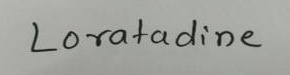

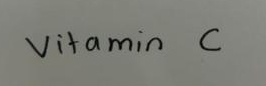

In [ ]:
# ==============================
# 🪟 STEP 7: Crop Detected Medicines
# ==============================

import os
import cv2
from IPython.display import Image as IPImage

os.makedirs("/content/crops", exist_ok=True)

img = cv2.imread(image_path)
crop_paths = []

for r in results:
    for i, box in enumerate(r.boxes.xyxy):
        x1, y1, x2, y2 = map(int, box)
        crop = img[y1:y2, x1:x2]
        crop_path = f"/content/crops/medicine_{i+1}.jpg"
        cv2.imwrite(crop_path, crop)
        crop_paths.append(crop_path)
        print(f"✅ Saved: {crop_path}")

print("\n🖼️ Showing cropped medicine images:\n")
for path in crop_paths:
    display(IPImage(filename=path))


In [ ]:
# ==============================
# 🧾 STEP 8: OCR and Fuzzy Matching on Cropped Medicines
# ==============================

!pip install transformers datasets pillow torch torchvision torchaudio rapidfuzz opencv-python matplotlib jellyfish --quiet

import os, re, cv2, torch, numpy as np, matplotlib.pyplot as plt
from PIL import Image
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from rapidfuzz import fuzz, distance
import jellyfish

# ==========================
# Initialize TrOCR Model
# ==========================
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

# ==========================
# Medicine Database & Helpers
# ==========================
medicine_db = sorted(set([
    "Paracetamol", "Aspirin", "Amoxicillin", "Ibuprofen", "Codeine",
    "Cetirizine", "Azithromycin", "Metformin", "Doxycycline", "Alavert", "Benadryl",
    "Loratadine", "Omeprazole", "Pantoprazole", "Ranitidine", "Panadol", "Cephalexin",
    "Ciprofloxacin", "Amoxicillin-Clavulanate", "Ofloxacin", "Exedrin",
    "Levocetirizine", "Montelukast", "Domperidone",
    "Cough Syrup", "ORS", "Vitamin C", "Folic Acid", "Iron",
    "Chlorpheniramine", "Diclofenac", "Naproxen", "Acetaminophen"
]))

synonyms = {
    "pcm": "Paracetamol",
    "crocin": "Paracetamol",
    "calpol": "Paracetamol",
    "acetaminophen": "Paracetamol",
    "brufen": "Ibuprofen",
    "flexon": "Ibuprofen",
    "augmented amoxicillin": "Amoxicillin-Clavulanate",
}

UNIT_WORDS = r"(mg|ml|mcg|tab|tabs|tablet|tablets|cap|caps|capsule|capsules|syrup|syp|od|bd|tds|hs|prn)"
OCR_CONFUSIONS = [
    ("0", "o"), ("1", "l"), ("5", "s"), ("8", "b"),
    ("rn", "m"), ("cl", "d"), ("vv", "w")
]

def normalize_text(t):
    t = t.lower()
    for wrong, right in OCR_CONFUSIONS:
        t = t.replace(wrong, right)
    t = re.sub(rf"\b{UNIT_WORDS}\b", " ", t)
    t = re.sub(r"[^a-z\s]", " ", t)
    t = re.sub(r"\s+", " ", t).strip()
    return t

def dynamic_threshold(token):
    L = len(token)
    if L >= 10: return 65.0
    elif L >= 7: return 70.0
    else: return 75.0

def phonetic_code(word):
    try:
        return jellyfish.metaphone(word)
    except:
        return word

# ==========================
# 🧠 Improved Fuzzy Matching Logic
# ==========================
def combined_score(token, candidate):
    """Weighted combination of string similarity metrics"""
    scores = [
        fuzz.WRatio(token, candidate),
        fuzz.partial_ratio(token, candidate),
        fuzz.token_sort_ratio(token, candidate),
        distance.Levenshtein.normalized_similarity(token, candidate) * 100,
    ]
    # Add bonus if they sound similar (phonetic similarity)
    if phonetic_code(token) == phonetic_code(candidate):
        scores.append(90)
    # Weighted mean: prioritize high individual match & overall average
    return 0.5 * max(scores) + 0.5 * (sum(scores)/len(scores))

def pattern_boost(token, candidate, score):
    """Fine-tune similarity based on prefix/suffix alignment"""
    token, candidate = token.lower(), candidate.lower()
    if token[0] != candidate[0]:
        score -= 15
    if token[:2] == candidate[:2]:
        score += 8
    if token[:3] == candidate[:3]:
        score += 10
    if token.endswith("ine") and candidate.endswith("ine"):
        score += 15
    for suf_len in [2, 3, 4]:
        if len(token) >= suf_len and len(candidate) >= suf_len:
            if token[-suf_len:] == candidate[-suf_len:]:
                score += 5
    return max(min(score, 100.0), 0.0)

def best_match(token, choices):
    """Return best matching medicine for given token"""
    if token in synonyms:
        return synonyms[token], 99.0, [(synonyms[token], 99.0)]
    scored = []
    for cand in choices:
        base = combined_score(token, cand)
        boosted = pattern_boost(token, cand, base)
        scored.append((cand, boosted))
    scored.sort(key=lambda x: x[1], reverse=True)
    best_name, best_score = scored[0]
    thr = dynamic_threshold(token)
    final_name = best_name if best_score >= thr else f"UNCERTAIN({token})"
    return final_name, best_score, scored[:3]

# ==========================
# OCR + Matching Loop
# ==========================
print("\n🔍 Running OCR + Fuzzy Matching on Cropped Medicines...\n")

for path in crop_paths:
    print(f"\n📄 Processing: {os.path.basename(path)}")
    image = Image.open(path).convert("RGB")

    # Run TrOCR
    pixel_values = processor(images=image, return_tensors="pt").pixel_values.to(device)
    generated_ids = model.generate(pixel_values)
    raw_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    print("📝 Raw OCR Text:", raw_text)

    # Clean + tokenize text
    clean = normalize_text(raw_text)
    tokens = [t for t in clean.split() if len(t) >= 4]
    print("🔧 Tokens:", tokens)

    results = []
    for tok in tokens:
        match_name, score, top3 = best_match(tok, medicine_db)
        results.append((tok, match_name, score, top3))

    for tok, name, score, top3 in results:
        print(f"\nToken: {tok}")
        print(f"  → Best: {name} (score: {score:.2f})")
        print("  → Top-3 candidates:")
        for cand, sc in top3:
            print(f"     - {cand} ({sc:.2f})")

    final_meds = [name for _, name, s, _ in results if not name.startswith("UNCERTAIN")]
    uncertain = [tok for tok, name, s, _ in results if name.startswith("UNCERTAIN")]

    print("\n✅ Final Medicines (confident):", final_meds if final_meds else "None")
    if uncertain:
        print("⚠️ Uncertain tokens (review needed):", uncertain)


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🔍 Running OCR + Fuzzy Matching on Cropped Medicines...


📄 Processing: medicine_1.jpg
📝 Raw OCR Text: loxatadine
🔧 Tokens: ['loxatadine']

Token: loxatadine
  → Best: Loratadine (score: 100.00)
  → Top-3 candidates:
     - Loratadine (100.00)
     - Ranitidine (80.37)
     - Codeine (75.16)

✅ Final Medicines (confident): ['Loratadine']

📄 Processing: medicine_2.jpg
📝 Raw OCR Text: vitamin C
🔧 Tokens: ['vitamin']

Token: vitamin
  → Best: Vitamin C (score: 98.65)
  → Top-3 candidates:
     - Vitamin C (98.65)
     - Metformin (50.56)
     - Acetaminophen (48.74)

✅ Final Medicines (confident): ['Vitamin C']


In [ ]:
# ==============================
# 🔍 STEP 8: Run EasyOCR on Crops
# ==============================

import easyocr

reader = easyocr.Reader(['en'])

print("\n🔍 Detected Text from Cropped Medicines:\n")
for path in crop_paths:
    result = reader.readtext(path, detail=0)
    print(f"{os.path.basename(path)} → {result}")



🔍 Detected Text from Cropped Medicines:

medicine_1.jpg → ['Loratadine']
medicine_2.jpg → ['Vifamin', 'C']
